# Topic 2: Exploratory Data Analysis

### This workbook loads the Churn data we have been looking at Excel. It does some EDA by examining the data hygiene (missing data, data types, duplicates, outliers) and some data exploration of relationships

## 1. Imports and libraries

In [ ]:

!pip install sweetviz
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive  # if using colab uncomment this line

import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 39.1 MB/s eta 0:00:00


## 2. Load the data

In [ ]:
# mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change the directory to our file location
os.chdir('/content/drive/MyDrive/datasets')

In [ ]:
df_churn = pd.read_csv('synthetic_churn.csv')

## 3. Basic exploration

In [ ]:
df_churn.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
2,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703
3,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
4,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177


In [ ]:
df_churn.shape

(6688, 27)

In [ ]:
df_churn.describe().round(1)

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
count,6688.0,6688.0,6687.0,6688.0,6688.0,6688.0,6688.0,6688.0,6688.0,6688.0,6688.0,6688.0,6688.0
mean,32.3,131.0,322.7,51.1,130.1,33.6,0.9,6.7,3.4,47.4,0.8,31.0,1083.6
std,24.6,121.9,288.6,103.6,243.5,76.3,1.4,7.5,12.6,17.0,1.7,16.3,1127.1
min,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,5.0,6.0
25%,9.0,31.0,76.8,0.0,0.0,0.0,0.0,1.0,0.0,33.0,0.0,16.0,181.0
50%,29.0,98.0,250.3,0.0,0.0,0.0,0.0,5.0,0.0,47.0,0.0,31.0,647.0
75%,55.0,199.0,497.6,52.0,140.4,16.4,2.0,9.0,0.0,60.0,0.0,43.0,1732.2
max,77.0,918.0,1234.2,1120.0,1372.5,585.8,5.0,43.0,99.0,85.0,6.0,78.0,5574.0


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6688 non-null   object 
 1   Churn Label                        6688 non-null   object 
 2   Account Length (in months)         6688 non-null   int64  
 3   Local Calls                        6688 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6688 non-null   float64
 6   Intl Mins                          6688 non-null   float64
 7   Intl Active                        6688 non-null   object 
 8   Intl Plan                          6688 non-null   object 
 9   Extra International Charges        6688 non-null   float64
 10  Customer Service Calls             6688 non-null   int64  
 11  Avg Monthly GB Download            6688 non-null   int64

## 4. Duplicates

In [ ]:
# Count number of full line duplicates
sum(df_churn.duplicated())


1

In [ ]:
# Count number of duplicates in just one column
sum(df_churn.duplicated(['Customer ID']))

1

In [ ]:
# Bring back row(s) that have a dulicate in the Customer ID column
df_churn[df_churn.duplicated(['Customer ID'])]


,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
1,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10


In [ ]:
# Remove duplicate rows
dfNo_duplicate = df_churn.drop_duplicates()   # if there are 2 rows the same, this deletes one
print(df_churn.shape)
print(dfNo_duplicate.shape)


(6688, 27)
(6687, 27)


In [ ]:
# Remove all duplicate rows
dfNo_duplicate = df_churn.drop_duplicates(keep=False)   # if there are 2 rows the same, this deletes both
print(df_churn.shape)
print(dfNo_duplicate.shape)

(6688, 27)
(6686, 27)


In [ ]:
df_churn.head(3)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
2,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703


## 5. Missing Values
 We know from df.info() that Local Mins has a null value

In [ ]:
df_churn.notnull().sum()         #  try isnull()


,0
Customer ID,6688
Churn Label,6688
Account Length (in months),6688
Local Calls,6688
Local Mins,6687
Intl Calls,6688
Intl Mins,6688
Intl Active,6688
Intl Plan,6688
Extra International Charges,6688


In [ ]:
df_churn[df_churn['Local Mins'].isnull()]

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
5,2956-TXCJ,No,62,184,NaN,310.0,694.4,Yes,yes,0.0,...,51,No,No,No,0,No,One Year,Direct Debit,28,1720


In [ ]:
# so we know index 5 has at least one empty / missing value (notice that this is row 5)
df_churn.iloc[5]
# NaN

Customer ID                             2956-TXCJ
Churn Label                                    No
Account Length (in months)                     62
Local Calls                                   184
Local Mins                                    NaN
Intl Calls                                  310.0
Intl Mins                                   694.4
Intl Active                                   Yes
Intl Plan                                     yes
Extra International Charges                   0.0
Customer Service Calls                          0
Avg Monthly GB Download                         3
Unlimited Data Plan                           Yes
Extra Data Charges                              0
State                                          WV
Phone Number                             330-8173
Gender                                       Male
Age                                            51
Under 30                                       No
Senior                                         No


In [ ]:
df_churn[:6]

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
2,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703
3,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
4,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177
5,2956-TXCJ,No,62,184,NaN,310.0,694.4,Yes,yes,0.0,...,51,No,No,No,0,No,One Year,Direct Debit,28,1720


In [ ]:
# If we know the correct value, let's replace it
df_churn.iloc[5, df_churn.columns.get_loc('Local Mins')] = 999
df_churn.iloc[5]

,5
Customer ID,2956-TXCJ
Churn Label,No
Account Length (in months),62
Local Calls,184
Local Mins,999.0
Intl Calls,310.0
Intl Mins,694.4
Intl Active,Yes
Intl Plan,yes
Extra International Charges,0.0


In [ ]:
print(df_churn.shape)
df_churn = df_churn.dropna()  # drops rows with any na
print(df_churn.shape)

(6688, 27)
(6688, 27)


## Distributions and looking for outliers

## 6. Histograms

<Axes: xlabel='Local Mins', ylabel='Count'>

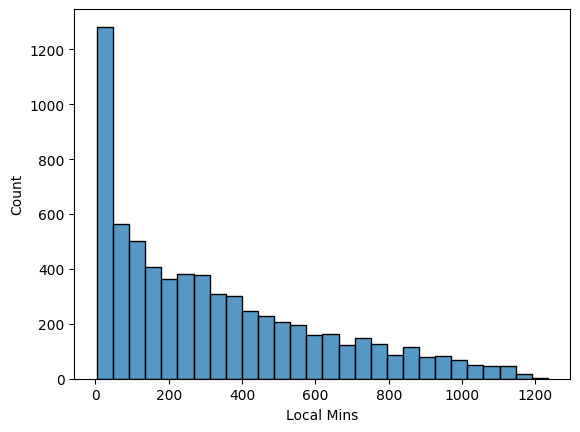

In [ ]:
# sns.histplot(data=df_churn, x='Total Charges')
sns.histplot(data=df_churn, x='Local Mins')


[Text(0.5, 1.0, 'Local Mins distribution')]

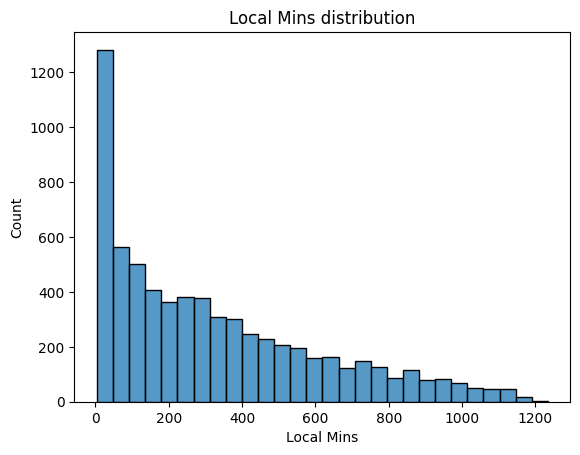

In [ ]:
# add a title
sns.histplot(data=df_churn, x='Local Mins').set(title='Local Mins distribution')


<Axes: xlabel='Local Mins', ylabel='Count'>

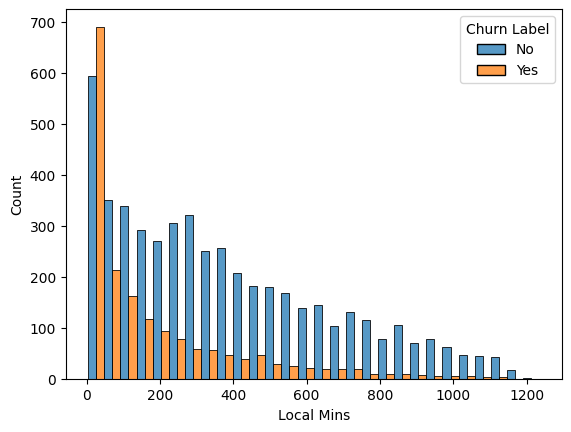

In [ ]:
# Let's split by Churn
sns.histplot(data=df_churn, x='Local Mins', hue = 'Churn Label', multiple = "dodge") # moves across slightly

[]

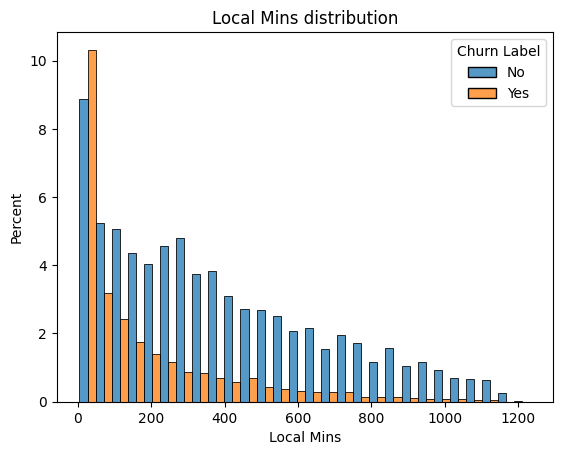

In [ ]:
# Showing percents instead of counts
p = sns.histplot(data=df_churn, x='Local Mins', hue = 'Churn Label', stat='percent', multiple = "dodge")
p.set(title='Local Mins distribution')
p.plot()

# https://datagy.io/seaborn-histplot/

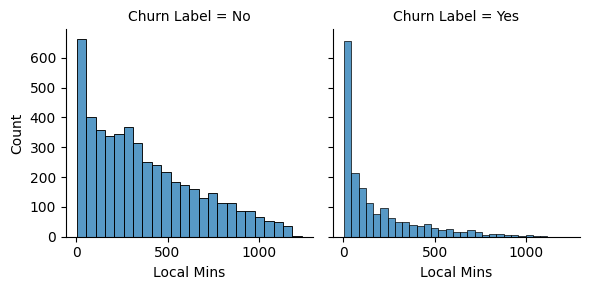

In [ ]:
g = sns.FacetGrid(data=df_churn, col='Churn Label', col_wrap=2)
g.map(sns.histplot, 'Local Mins')

## 7. Box plots

[Text(0.5, 1.0, 'Local Mins distribution')]

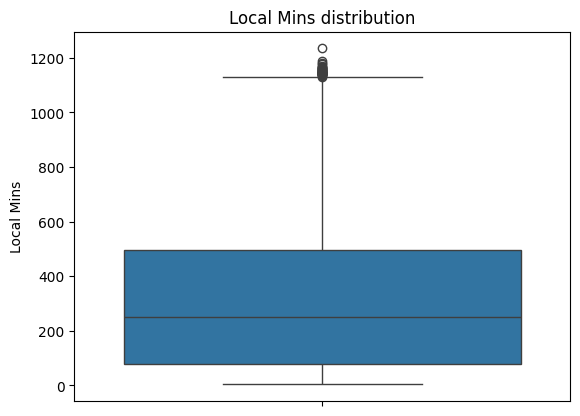

In [ ]:

sns.boxplot(y="Local Mins", data=df_churn).set(title='Local Mins distribution')


[Text(0.5, 1.0, 'Local Mins by Churn')]

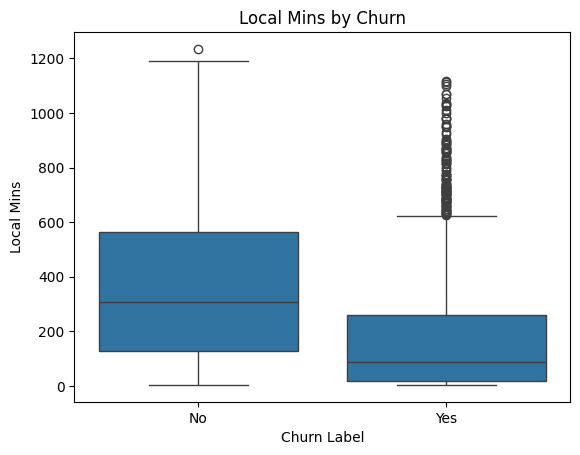

In [ ]:
# boxplots by Churn Label
sns.boxplot(y="Local Mins", x = "Churn Label", data=df_churn).set(title = "Local Mins by Churn")

### ? Any insights from above chart?
### ? Could local mins be useful in predicting Churn maybe?
### ? Any difference in outliers?
###    

## Exploring Data and relationships

## 8. Bar Charts looking at Churn

[Text(0.5, 1.0, 'Contract Type and Churn')]

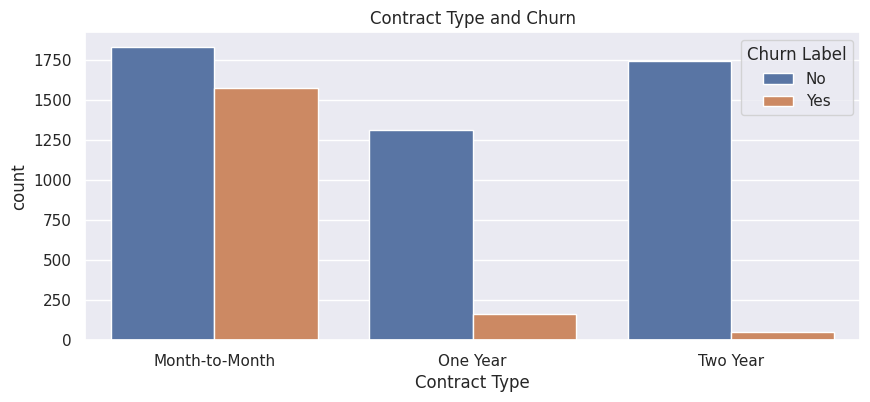

In [ ]:
# multivariate
# Contract type is a Categorical variable so we are counting values
g = sns.countplot(data=df_churn, x='Contract Type',  hue='Churn Label')
g.set(title='Contract Type and Churn')


[Text(0.5, 1.0, 'Contract Type and Churn')]

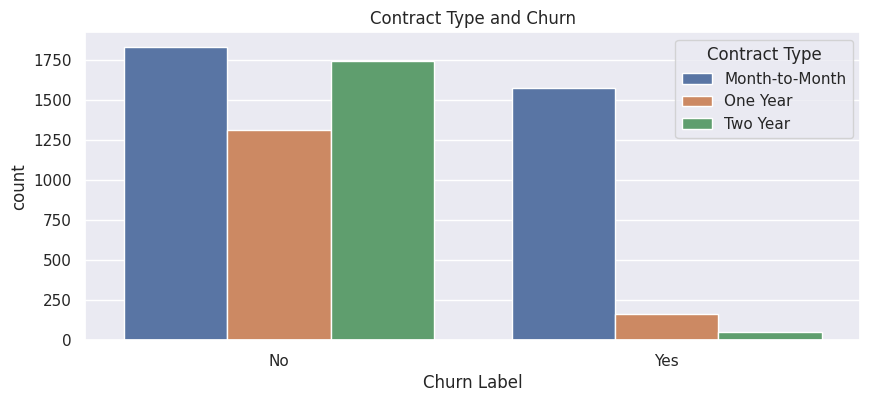

In [ ]:
sns.set(rc={"figure.figsize":(10, 4)})
g = sns.countplot(data=df_churn, x='Churn Label', hue='Contract Type')
g.set(title='Contract Type and Churn')


## 9. Scatter plots

<Axes: xlabel='Age', ylabel='Monthly Charge'>

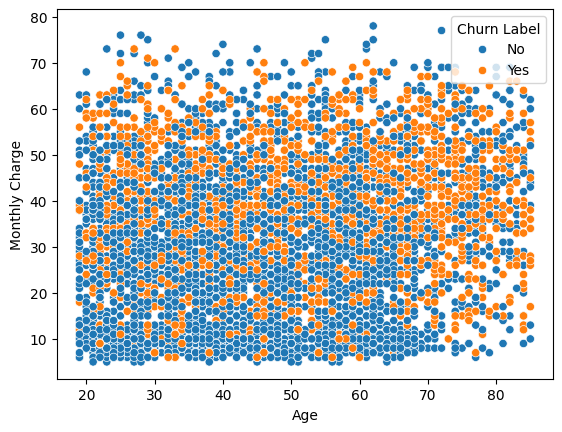

In [ ]:
sns.scatterplot(x='Age', y='Monthly Charge', data=df_churn, hue='Churn Label')

<Axes: xlabel='Intl Calls', ylabel='Intl Mins'>

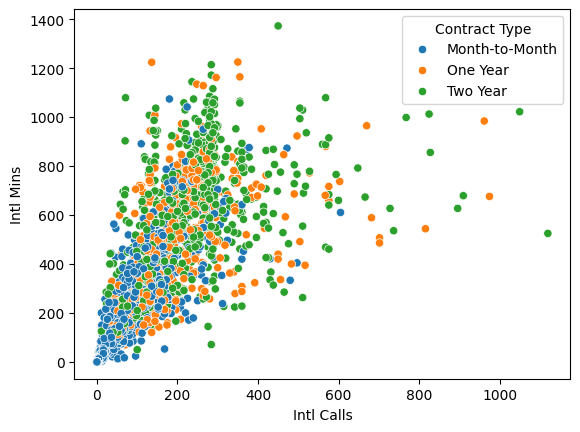

In [ ]:
sns.scatterplot(x='Intl Calls', y='Intl Mins', data=df_churn, hue='Contract Type')
#sns.scatterplot(x='Intl Calls', y='Intl Mins', data=df_churn, hue='Gender')

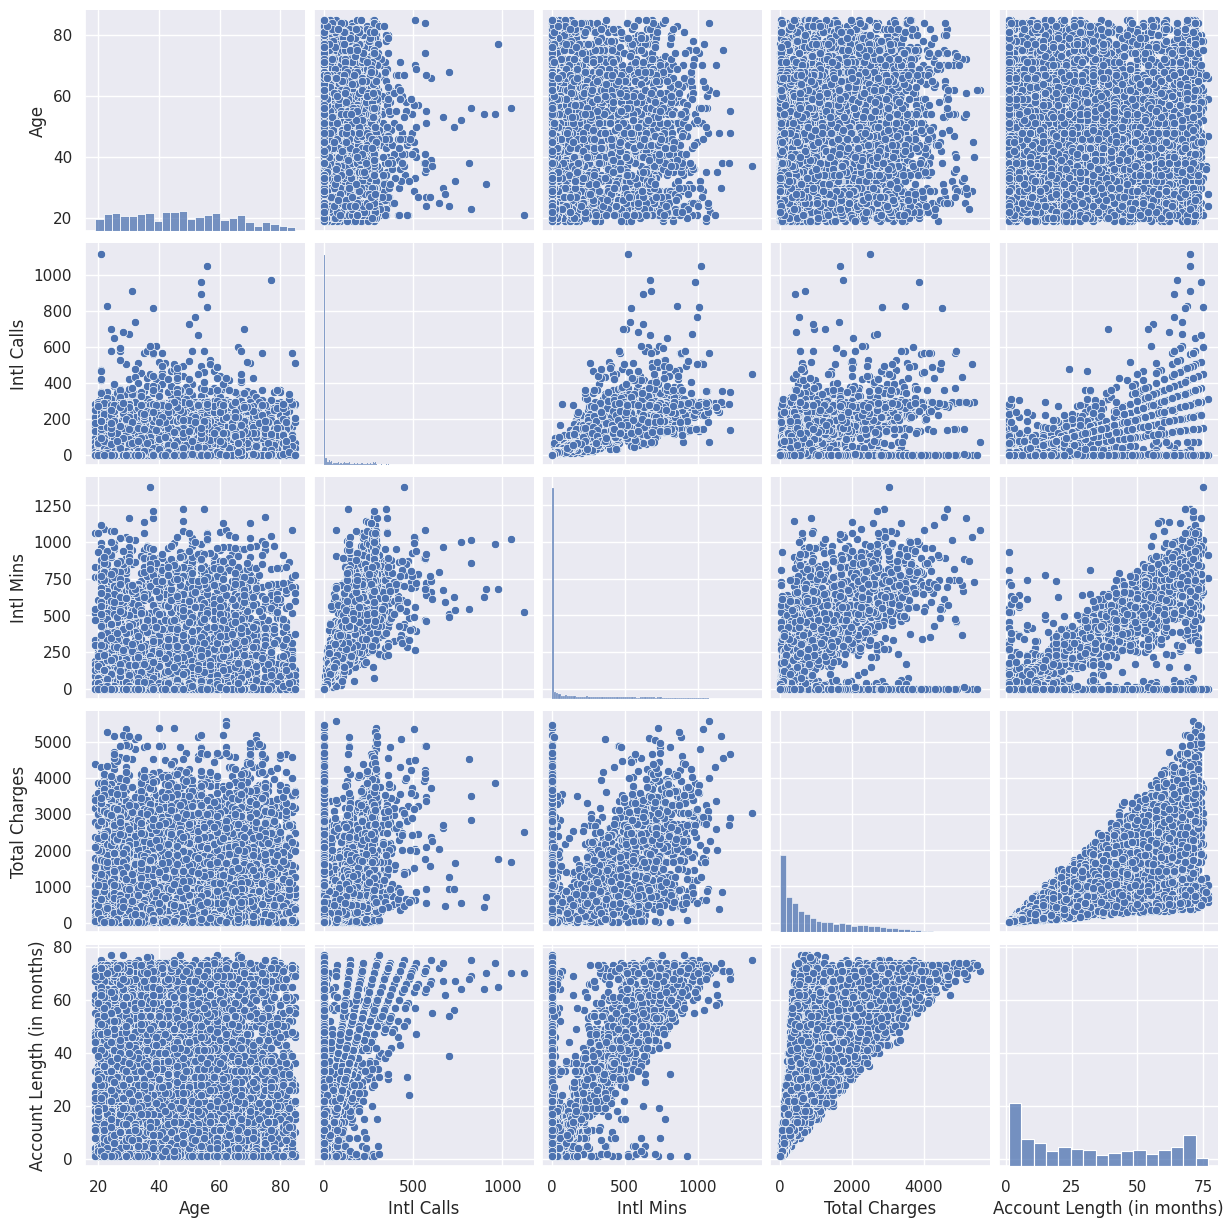

In [ ]:
sns.pairplot(df_churn[['Age', 'Intl Calls', 'Intl Mins', 'Total Charges', 'Account Length (in months)']])

## 10. Correlation Matrix

In [ ]:
# df_churn.corr()
df_subset = df_churn[['Age', 'Intl Calls', 'Intl Mins', 'Total Charges', 'Account Length (in months)']]
df_subset.corr()

,Age,Intl Calls,Intl Mins,Total Charges,Account Length (in months)
Age,1.000000,0.001163,0.005292,0.070377,0.008749
Intl Calls,0.001163,1.000000,0.859412,0.278788,0.352500
Intl Mins,0.005292,0.859412,1.000000,0.298015,0.374442
Total Charges,0.070377,0.278788,0.298015,1.000000,0.788665
Account Length (in months),0.008749,0.352500,0.374442,0.788665,1.000000


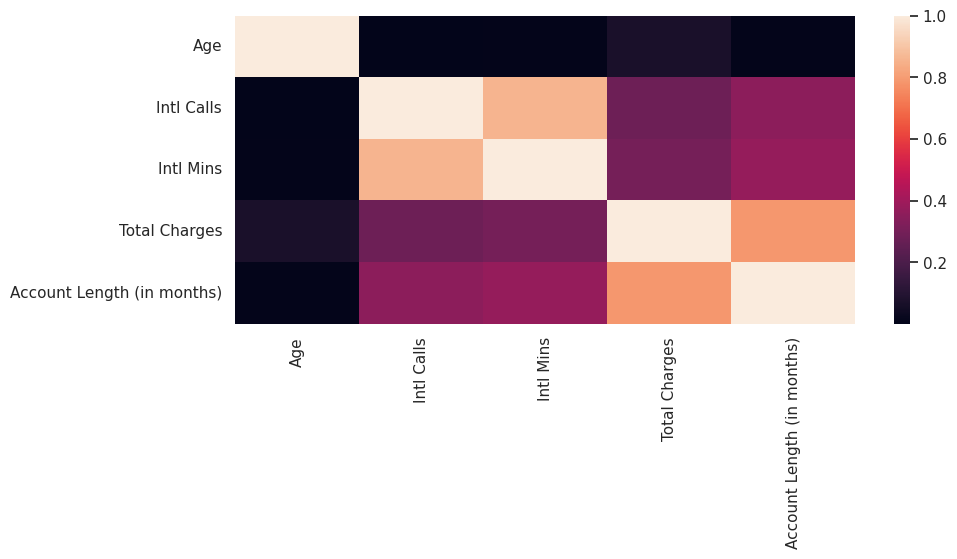

In [ ]:
sns.heatmap(df_subset.corr());

##  11. Quick EDA with Sweetviz

In [ ]:
import sweetviz as sv

Report = sv.analyze(df_churn)

Report.show_notebook()           # This will create a report below
Report.show_html('Report.html')  # This creates in html report that is saved in your directory

Output hidden; open in https://colab.research.google.com to view.